In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import random
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Activation, Dense , Dropout, Conv2D , MaxPool2D , Flatten
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.metrics import confusion_matrix, classification_report

In [2]:
train = pd.read_csv('../input/fashionmnist/fashion-mnist_train.csv')
test = pd.read_csv('../input/fashionmnist/fashion-mnist_test.csv')

In [3]:
train.isnull().sum().sum()

0

In [4]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 60000 entries, 0 to 59999
Columns: 785 entries, label to pixel784
dtypes: int64(785)
memory usage: 359.3 MB


In [5]:
train.columns

Index(['label', 'pixel1', 'pixel2', 'pixel3', 'pixel4', 'pixel5', 'pixel6',
       'pixel7', 'pixel8', 'pixel9',
       ...
       'pixel775', 'pixel776', 'pixel777', 'pixel778', 'pixel779', 'pixel780',
       'pixel781', 'pixel782', 'pixel783', 'pixel784'],
      dtype='object', length=785)

In [6]:
X_train = train.drop('label' , axis = 1).values
y_train = train['label'].values
X_test = test.drop('label' , axis = 1).values
y_test = test['label'].values

In [7]:
X_train = X_train/255.0
X_test = X_test/255.0

In [8]:
X_train = X_train.reshape(-1,28,28,1)
X_test= X_test.reshape(-1,28,28,1)

In [9]:
label_meaning  = {0: 'T-shirt/top',
1: 'Trouser',
2: 'Pullover',
3: 'Dress',
4: 'Coat',
5: 'Sandal',
6: 'Shirt',
7: 'Sneaker',
8: 'Bag',
9: 'Ankle boot'}

Pullover


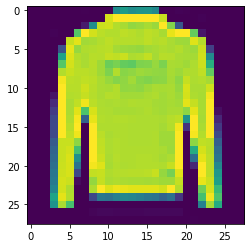

In [10]:
ran_in = random.randint(0,59999)
plt.imshow(X_train[ran_in].reshape(28,28))
print(label_meaning[y_train[ran_in]])

In [11]:
optimizers = Adam(learning_rate=0.001,
                 beta_1 = 0.9,
                 beta_2=0.999,
                 epsilon=1e-07,
                 amsgrad = False,
                 name = 'Adam')

In [12]:
model = Sequential()

model.add(Conv2D(filters = 32, kernel_size = (5,5),padding = 'Same', 
                 activation ='relu', input_shape = (28,28,1)))
model.add(Conv2D(filters = 32, kernel_size = (5,5),padding = 'Same', 
                 activation ='relu'))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Dropout(0.25))


model.add(Conv2D(filters = 64, kernel_size = (3,3),padding = 'Same', 
                 activation ='relu'))
model.add(Conv2D(filters = 64, kernel_size = (3,3),padding = 'Same', 
                 activation ='relu'))
model.add(MaxPool2D(pool_size=(2,2), strides=(2,2)))
model.add(Dropout(0.25))


model.add(Flatten())
model.add(Dense(256, activation = "relu"))
model.add(Dropout(0.5))
model.add(Dense(10, activation = "softmax"))

In [13]:
model.compile(optimizers , loss = 'sparse_categorical_crossentropy')

In [14]:
early_stop = EarlyStopping(monitor = 'val_loss', patience = 5, mode = 'min')

In [15]:
model.fit(x = X_train,y = y_train,
         epochs = 30,
         validation_data = (X_test , y_test),
         callbacks = [early_stop],
         batch_size = 64)

Train on 60000 samples, validate on 10000 samples
Epoch 1/30
60000/60000 [==============================] - 10s 165us/sample - loss: 0.5068 - val_loss: 0.3190
Epoch 2/30
60000/60000 [==============================] - 5s 90us/sample - loss: 0.3231 - val_loss: 0.2627
Epoch 3/30
60000/60000 [==============================] - 5s 89us/sample - loss: 0.2796 - val_loss: 0.2353
Epoch 4/30
60000/60000 [==============================] - 5s 90us/sample - loss: 0.2546 - val_loss: 0.2190
Epoch 5/30
60000/60000 [==============================] - 5s 89us/sample - loss: 0.2364 - val_loss: 0.1965
Epoch 6/30
60000/60000 [==============================] - 5s 90us/sample - loss: 0.2224 - val_loss: 0.1974
Epoch 7/30
60000/60000 [==============================] - 5s 88us/sample - loss: 0.2106 - val_loss: 0.1953
Epoch 8/30
60000/60000 [==============================] - 5s 91us/sample - loss: 0.1986 - val_loss: 0.1886
Epoch 9/30
60000/60000 [==============================] - 5s 88us/sample - loss: 0.1912 - va

In [16]:
loss = pd.DataFrame(model.history.history)

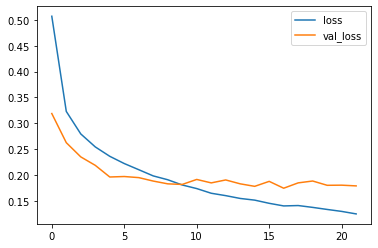

In [17]:
loss.plot()

In [21]:
pwd

'/kaggle/working'

In [20]:
model.save('Fashion_mnist_model.h5')

In [22]:
prediction =model.predict_classes(X_test)

In [23]:
print(confusion_matrix(y_test , prediction))
print(classification_report(y_test , prediction))

[[872   0  17   6   2   0 101   0   2   0]
 [  0 996   0   1   0   0   2   0   1   0]
 [ 10   0 912   6  37   0  35   0   0   0]
 [ 12   5   6 940  25   0  12   0   0   0]
 [  0   0  20   9 931   0  40   0   0   0]
 [  0   0   0   0   0 991   0   7   1   1]
 [ 69   0  37  22  40   0 831   0   1   0]
 [  0   0   0   0   0   3   0 987   0  10]
 [  0   0   0   1   0   0   8   0 990   1]
 [  0   0   0   0   0   4   0  30   0 966]]
              precision    recall  f1-score   support

           0       0.91      0.87      0.89      1000
           1       1.00      1.00      1.00      1000
           2       0.92      0.91      0.92      1000
           3       0.95      0.94      0.95      1000
           4       0.90      0.93      0.91      1000
           5       0.99      0.99      0.99      1000
           6       0.81      0.83      0.82      1000
           7       0.96      0.99      0.98      1000
           8       0.99      0.99      0.99      1000
           9       0.99     